In [ ]:
import pandas as pd
  
    # Replace with the path to your dataset(book1)
dataset_path =pd.read_csv("Book1.csv") 
   
    # Replace with the name of the column to drop
column_to_drop = 'column_name'

modified_dataset = drop_column(dataset_path, column_to_drop)

# Replace with the name of the column to drop
print(modified_dataset.head()) 

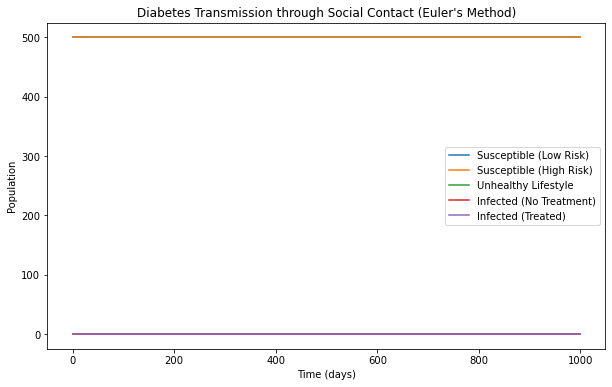

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1000 / (71 * 365)
p = 0.5
beta = 0.00025
k = 2
sigma = 1 / (10 * 365)
gamma = 1 / (5 * 365)
phi = 1 / (5 * 365)
mu = 1 / (71 * 365)
delta_1 = 0.0001
delta_2 = 0.00001

# Initial conditions
S_l0 = 500
S_h0 = 500
E0 = 0
I0 = 0
T0 = 0

# Time parameters
t_start = 0
t_end = 1000
dt = 1
t = np.arange(t_start, t_end, dt)

# Number of steps
n_steps = len(t)

# Initialize arrays to store the results
S_l = np.zeros(n_steps)
S_h = np.zeros(n_steps)
E = np.zeros(n_steps)
I = np.zeros(n_steps)
T = np.zeros(n_steps)

# Set initial conditions
S_l[0] = S_l0
S_h[0] = S_h0
E[0] = E0
I[0] = I0
T[0] = T0

# Euler's method
for i in range(1, n_steps):
    S_l[i] = S_l[i-1] + dt * ((1 - p) * A - beta * S_l[i-1] * E[i-1] / (S_l[i-1] + S_h[i-1] + E[i-1] + I[i-1]) - mu * S_l[i-1])
    S_h[i] = S_h[i-1] + dt * (p * A - k * beta * S_h[i-1] * E[i-1] / (S_l[i-1] + S_h[i-1] + E[i-1] + I[i-1]) - mu * S_h[i-1])
    E[i] = E[i-1] + dt * (beta * S_l[i-1] * E[i-1] / (S_l[i-1] + S_h[i-1] + E[i-1] + I[i-1]) + k * beta * S_h[i-1] * E[i-1] / (S_l[i-1] + S_h[i-1] + E[i-1] + I[i-1]) - (sigma + mu) * E[i-1])
    I[i] = I[i-1] + dt * (sigma * E[i-1] - (delta_1 + mu + gamma) * I[i-1] + phi * T[i-1])
    T[i] = T[i-1] + dt * (gamma * I[i-1] - phi * T[i-1] - (mu + delta_2) * T[i-1])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S_l, label='Susceptible (Low Risk)')
plt.plot(t, S_h, label='Susceptible (High Risk)')
plt.plot(t, E, label='Unhealthy Lifestyle')
plt.plot(t, I, label='Infected (No Treatment)')
plt.plot(t, T, label='Infected (Treated)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('Diabetes Transmission through Social Contact (Euler\'s Method)')
plt.show()


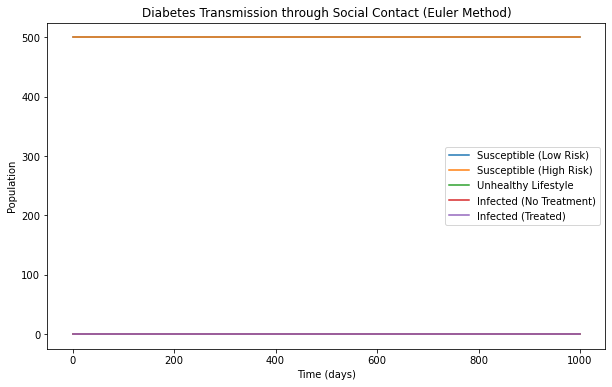

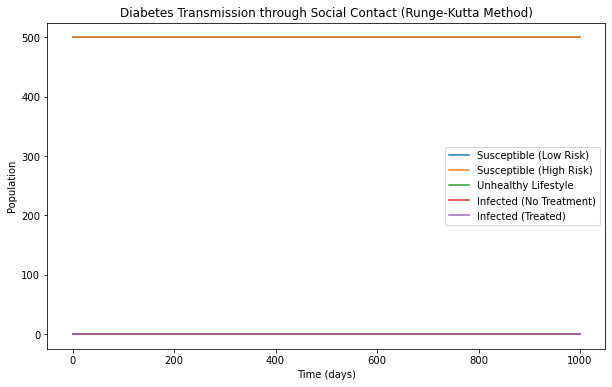

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1000 / (71 * 365)
p = 0.5
beta = 0.00025
k = 2
sigma = 1 / (10 * 365)
gamma = 1 / (5 * 365)
phi = 1 / (5 * 365)
mu = 1 / (71 * 365)
delta_1 = 0.0001
delta_2 = 0.00001

# Initial conditions
S_l0 = 500
S_h0 = 500
E0 = 0
I0 = 0
T0 = 0
initial_conditions = np.array([S_l0, S_h0, E0, I0, T0])

# Time points
t = np.linspace(0, 1000, 1000)
dt = t[1] - t[0]

# Derivatives function
def derivatives(y):
    S_l, S_h, E, I, T = y
    N = S_l + S_h + E + I
    dS_l_dt = (1 - p) * A - beta * S_l * E / N - mu * S_l
    dS_h_dt = p * A - k * beta * S_h * E / N - mu * S_h
    dE_dt = beta * S_l * E / N + k * beta * S_h * E / N - (sigma + mu) * E
    dI_dt = sigma * E - (delta_1 + mu + gamma) * I + phi * T
    dT_dt = gamma * I - phi * T - (mu + delta_2) * T
    return np.array([dS_l_dt, dS_h_dt, dE_dt, dI_dt, dT_dt])

# Euler's Method
def euler_method(y0, t, dt):
    y = y0.copy()
    results = [y]
    for _ in t[1:]:
        y = y + dt * derivatives(y)
        results.append(y)
    return np.array(results)

# Runge-Kutta Method (RK4)
def runge_kutta_method(y0, t, dt):
    y = y0.copy()
    results = [y]
    for _ in t[1:]:
        k1 = dt * derivatives(y)
        k2 = dt * derivatives(y + 0.5 * k1)
        k3 = dt * derivatives(y + 0.5 * k2)
        k4 = dt * derivatives(y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        results.append(y)
    return np.array(results)

# Perform simulations
euler_results = euler_method(initial_conditions, t, dt)
rk4_results = runge_kutta_method(initial_conditions, t, dt)

# Plot results
def plot_results(t, results, title):
    S_l, S_h, E, I, T = results.T
    plt.figure(figsize=(10, 6))
    plt.plot(t, S_l, label='Susceptible (Low Risk)')
    plt.plot(t, S_h, label='Susceptible (High Risk)')
    plt.plot(t, E, label='Unhealthy Lifestyle')
    plt.plot(t, I, label='Infected (No Treatment)')
    plt.plot(t, T, label='Infected (Treated)')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend()
    plt.title(title)
    plt.show()

plot_results(t, euler_results, 'Diabetes Transmission through Social Contact (Euler Method)')
plot_results(t, rk4_results, 'Diabetes Transmission through Social Contact (Runge-Kutta Method)')


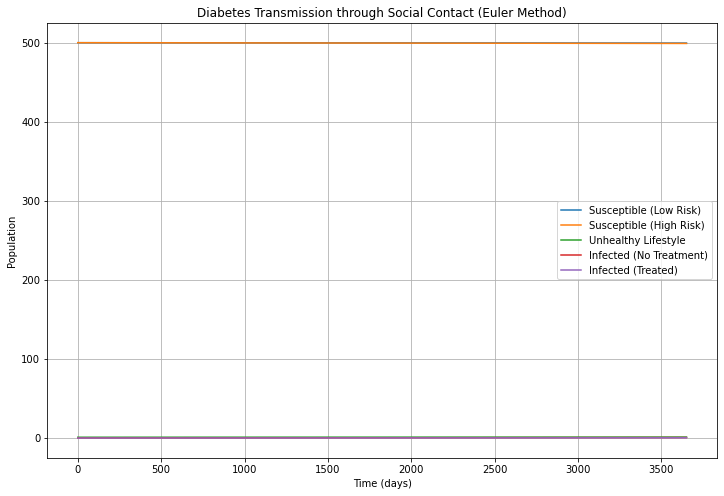

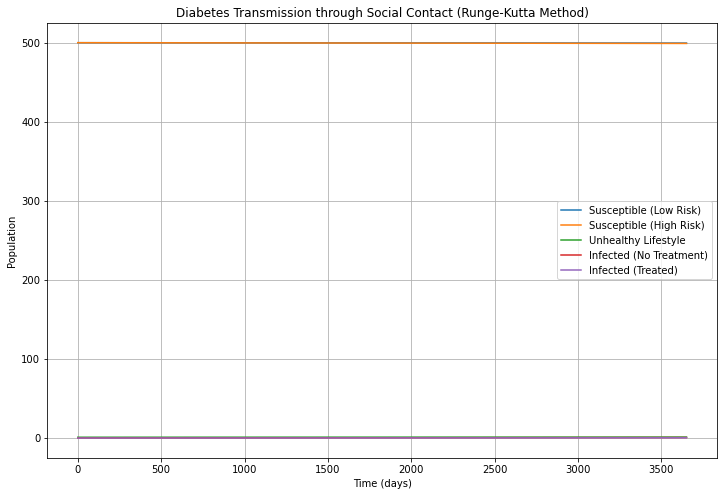

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1000 / (71 * 365)
p = 0.5
beta = 0.00025
k = 2
sigma = 1 / (10 * 365)
gamma = 1 / (5 * 365)
phi = 1 / (5 * 365)
mu = 1 / (71 * 365)
delta_1 = 0.0001
delta_2 = 0.00001

# Initial conditions
S_l0 = 500
S_h0 = 500
E0 = 1  # Starting with a small E value to avoid division by zero
I0 = 0
T0 = 0
initial_conditions = np.array([S_l0, S_h0, E0, I0, T0])

# Time points
t = np.linspace(0, 365*10, 10000)  # Simulate over 10 years with 10,000 points
dt = t[1] - t[0]

# Derivatives function
def derivatives(y):
    S_l, S_h, E, I, T = y
    N = S_l + S_h + E + I + T
    dS_l_dt = (1 - p) * A - beta * S_l * E / N - mu * S_l
    dS_h_dt = p * A - k * beta * S_h * E / N - mu * S_h
    dE_dt = beta * S_l * E / N + k * beta * S_h * E / N - (sigma + mu) * E
    dI_dt = sigma * E - (delta_1 + mu + gamma) * I + phi * T
    dT_dt = gamma * I - phi * T - (mu + delta_2) * T
    return np.array([dS_l_dt, dS_h_dt, dE_dt, dI_dt, dT_dt])

# Euler's Method
def euler_method(y0, t, dt):
    y = y0.copy()
    results = [y]
    for _ in t[1:]:
        y = y + dt * derivatives(y)
        results.append(y)
    return np.array(results)

# Runge-Kutta Method (RK4)
def runge_kutta_method(y0, t, dt):
    y = y0.copy()
    results = [y]
    for _ in t[1:]:
        k1 = dt * derivatives(y)
        k2 = dt * derivatives(y + 0.5 * k1)
        k3 = dt * derivatives(y + 0.5 * k2)
        k4 = dt * derivatives(y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        results.append(y)
    return np.array(results)

# Perform simulations
euler_results = euler_method(initial_conditions, t, dt)
rk4_results = runge_kutta_method(initial_conditions, t, dt)

# Plot results
def plot_results(t, results, title):
    S_l, S_h, E, I, T = results.T
    plt.figure(figsize=(12, 8))
    plt.plot(t, S_l, label='Susceptible (Low Risk)')
    plt.plot(t, S_h, label='Susceptible (High Risk)')
    plt.plot(t, E, label='Unhealthy Lifestyle')
    plt.plot(t, I, label='Infected (No Treatment)')
    plt.plot(t, T, label='Infected (Treated)')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

plot_results(t, euler_results, 'Diabetes Transmission through Social Contact (Euler Method)')
plot_results(t, rk4_results, 'Diabetes Transmission through Social Contact (Runge-Kutta Method)')


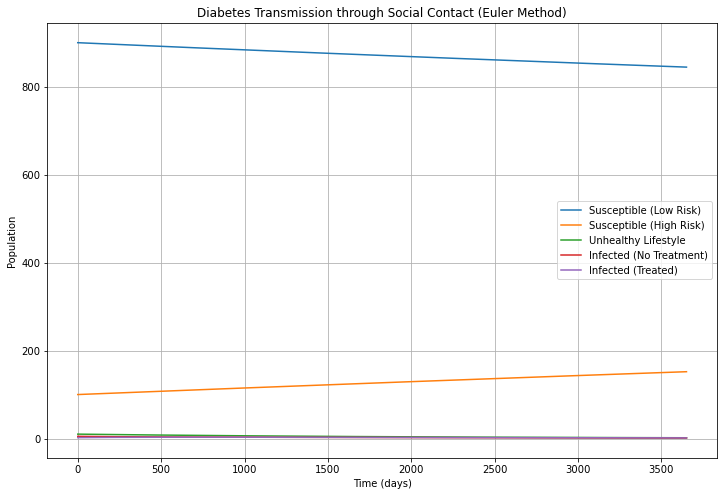

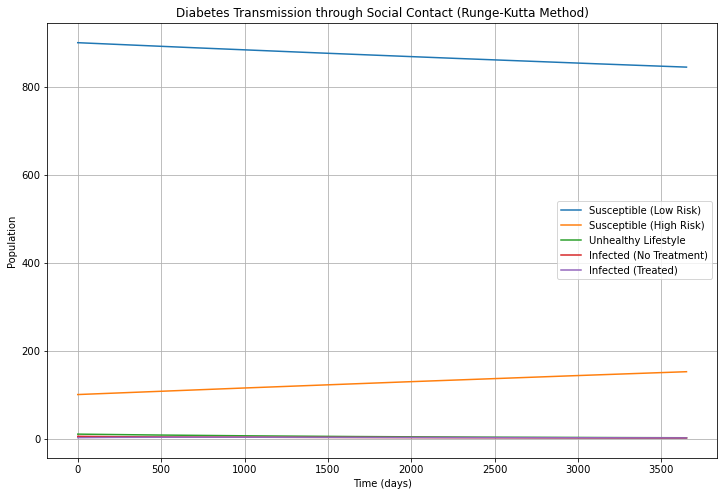

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Parameters
A = 1000 / (71 * 365)  # Birth rate, assuming a population birth rate
p = 0.5  # Proportion at high risk
beta = 0.0001  # Transmission rate for low-risk individuals
k = 2  # Risk factor multiplier for high-risk individuals
sigma = 1 / (5 * 365)  # Progression rate from unhealthy lifestyle to infected
gamma = 1 / (2 * 365)  # Treatment rate
phi = 1 / (3 * 365)  # Recovery rate from treatment
mu = 1 / (70 * 365)  # Natural mortality rate
delta_1 = 0.001  # Disease-induced death rate without treatment
delta_2 = 0.0005  # Disease-induced death rate with treatment

# Initial conditions
S_l0 = 900  # Susceptible low-risk
S_h0 = 100  # Susceptible high-risk
E0 = 10  # Unhealthy lifestyle
I0 = 5  # Infected (no treatment)
T0 = 2  # Infected (treated)
initial_conditions = np.array([S_l0, S_h0, E0, I0, T0])

# Time points
t = np.linspace(0, 365*10, 10000)  # Simulate over 10 years with 10,000 points
dt = t[1] - t[0]

# Derivatives function
def derivatives(y):
    S_l, S_h, E, I, T = y
    N = S_l + S_h + E + I + T
    dS_l_dt = (1 - p) * A - beta * S_l * E / N - mu * S_l
    dS_h_dt = p * A - k * beta * S_h * E / N - mu * S_h
    dE_dt = beta * S_l * E / N + k * beta * S_h * E / N - (sigma + mu) * E
    dI_dt = sigma * E - (delta_1 + mu + gamma) * I + phi * T
    dT_dt = gamma * I - phi * T - (mu + delta_2) * T
    return np.array([dS_l_dt, dS_h_dt, dE_dt, dI_dt, dT_dt])

# Euler's Method
def euler_method(y0, t, dt):
    y = y0.copy()
    results = [y]
    for _ in t[1:]:
        y = y + dt * derivatives(y)
        results.append(y)
    return np.array(results)

# Runge-Kutta Method (RK4)
def runge_kutta_method(y0, t, dt):
    y = y0.copy()
    results = [y]
    for _ in t[1:]:
        k1 = dt * derivatives(y)
        k2 = dt * derivatives(y + 0.5 * k1)
        k3 = dt * derivatives(y + 0.5 * k2)
        k4 = dt * derivatives(y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        results.append(y)
    return np.array(results)

# Perform simulations
euler_results = euler_method(initial_conditions, t, dt)
rk4_results = runge_kutta_method(initial_conditions, t, dt)

# Plot results
def plot_results(t, results, title):
    S_l, S_h, E, I, T = results.T
    plt.figure(figsize=(12, 8))
    plt.plot(t, S_l, label='Susceptible (Low Risk)')
    plt.plot(t, S_h, label='Susceptible (High Risk)')
    plt.plot(t, E, label='Unhealthy Lifestyle')
    plt.plot(t, I, label='Infected (No Treatment)')
    plt.plot(t, T, label='Infected (Treated)')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

plot_results(t, euler_results, 'Diabetes Transmission through Social Contact (Euler Method)')
plot_results(t, rk4_results, 'Diabetes Transmission through Social Contact (Runge-Kutta Method)')
